# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow.

![workflow_img.png](https://raw.github.com/suryansh-sinha/Learning-PyTorch/main/Daniel%20Bourke/images/01_PyTorch_Workflow/workflow_img.png)

In [ ]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to the data",
                      4: "making predictions and evaluating the model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

In [ ]:
import torch
from torch import nn  # nn contains basic building blocks of all neural network graphs (Tree graph)
# nn contains things like different types of layers, loss functions, activation functions etc. which are predefined for us in PyTorch.
import matplotlib.pyplot as plt

# Checking PyTorch version.
torch.__version__

'2.1.0+cu121'

## We now start implementation of our first machine learning algorithm in the PyTorch framework.

We are creating a simple linear regression algorithm (not neural network). And we optimize the parameters using normal gradient descent algorithm.


## 1. Data (Preparing and Loading)

Data can be almost anything... in machine learning.
* Excel Sheets
* Images of Any Kind
* Videos
* Audio like songs or podcasts
* DNA Sequences
* Text

Machine learning has 2 major parts -
1. Get data into numerical representation.
2. Build a model that can recognize and learn patters in that numerical representation.

![picture2](https://raw.github.com/suryansh-sinha/Learning-PyTorch/main/Daniel%20Bourke/images/01_PyTorch_Workflow/machine-learning-a-game-of-two-parts.png)

To showcase this, let's create some **known** data using the linear regression formula.

We'll use the linear regression formula to make a straight line with *known* **parameters**.

In [ ]:
# Known parameters. We want our model to calculate and get to this value for weights and biases.
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # X in machine learning is usually a tensor. It represents our features.
# unsqueeze(dim=1) adds an extra dimension so we have 1 more bracket in our tensor.
y = weight * X + bias # y contains our labels or data to be predicted.

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Now, we want our model to predict a value of y when we give it some value of X. To do that correctly, our model needs to figure out what the relation between X and y is. We already know that y = 0.7*X + 0.3. We now want our model to find out these values that are 0.7 and 0.3 after which it can make correct predictions.


### Splitting the data into training and test sets

* We can think of the training set as the resource where the model can learn from.
This is the data the model is trained on. 60-80% of the dataset.

* The validation set is where the model makes it's predictions and we can figure out how it's doing. You can think of this as the practice exam. This is where we tune our model. 10-20% of the dataset.

* The test set can be thought of as the final exam. This is where we evaluate the model's performance and see if it's ready for real world data. 10-20% of the dataset.

First we need to split up our dataset into a training and test set (and a validation set if needed). Splitting the data into training and testing sets so that our model can learn from the training data and we can test the model's performance on the testing dataset.

In [ ]:
train_split = int(0.8 * len(X)) # 80% data used for training set, 20% dataset used for testing.
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Now, let's create a function to visualize our data instead of it just being numbers on a page. To do that, we use matplotlib.

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

  # Plots training and test data and compares predictions.

  plt.figure(figsize=(10,7))  # Creates a new figure. figsize parameter takes width and height of figure in inches.

  # plt.scatter creates a scatter plot of y vs x. With varying marker size and/or color.
  # s represents the marker size. c represents the color of the marker.

  # Creating blue points for training data.
  plt.scatter(train_data, train_labels, s=8, c='b', marker='x', label="Training Data")

  # Creating green points for testing data. We can change the marker's shape also.
  plt.scatter(test_data, test_labels, s=8, c='g', marker='x', label="Testing Data")

  # Creating red points for our predicted data.
  if predictions is not None:
    # Plot the predictions if they exist.
    plt.scatter(test_data, predictions, c='r', s=8, label="Predictions")

  plt.legend(prop={'size': 14});

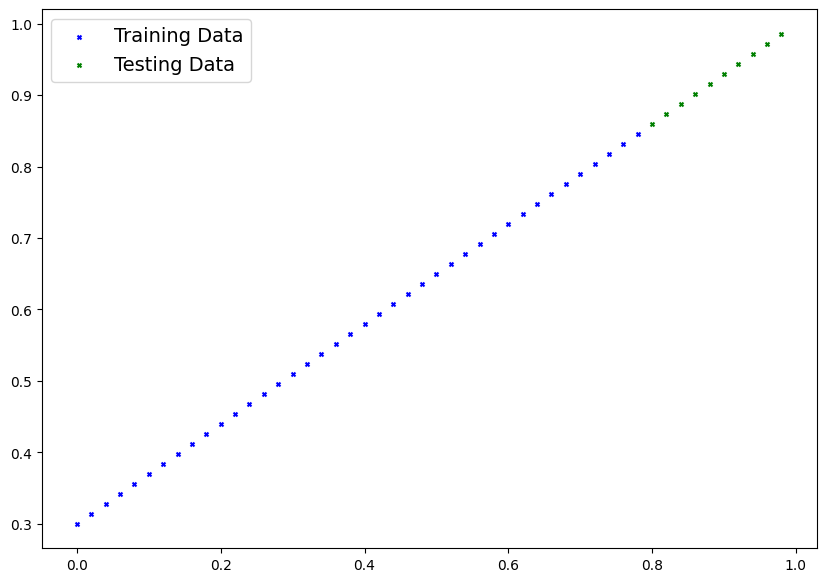

In [ ]:
plot_predictions();

## 2. Building Our Model

Creating our first PyTorch Model.

What our model does -
*   Start with random values (weight and bias)
*   Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create our data).

How does the model do so ?

Through two main algorithms:
1. [Gradient Descent](https://www.youtube.com/watch?v=IHZwWFHWa-w)
2. [Backpropagation](https://www.youtube.com/watch?v=Ilg3gGewQ5U)





In [ ]:
# Create a linear regression model class.

# Almost everything in PyTorch inherits from nn.Module.
# nn.Module is the base class for all neural network models. All models should subclass this class.
# Modules can also contain other modules so, you can nest them in a tree structure.
# Our class LinearRegressionModel inherits nn.Module class.
# We can name our class anything though. (It's not like this should be the exact name.)
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # Initialize model parameters. This step is also not necessary.
    self.weights = nn.Parameter(torch.randn(1,                      # Start with random weight. This will get adjusted as model learns.
                                            requires_grad = True,   # Can we update this value with gradient descent?
                                            dtype=torch.float))     # PyTorch loves float32 by default.

    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad = True,
                                        dtype=torch.float))

  # Writing the function for forward propagation. When a value is passed through the model, what happens.
  # The model multiplies the input x given to it by weight and adds bias to it.
  # forward defines the computation made at every call.
  # Any subclass of nn.Module requires forward method to be overwritten.
  def forward(self, x: torch.Tensor) -> torch.Tensor:   # 'x' is expected to be of type torch.Tensor and the function outputs torch.Tensor.
    return self.weights * x + self.bias   # This is the linear regression formula (y = mx + b)


We've set `requires_grad=True` here, so, PyTorch will track all of the gradients for weights and bias in the background using [`torch.autograd`](https://pytorch.org/docs/stable/autograd.html).

Image explaining the above code -
![linear model explained](https://raw.github.com/suryansh-sinha/Learning-PyTorch/main/Daniel%20Bourke/images/01_PyTorch_Workflow/pytorch-linear-model-annotated.png)

### PyTorch Model Building Essentials

* `torch.nn` - contains all the building blocks for computational graphs (neural networks can be considered computational graphs)
* `torch.nn.Parameter` - what parameters should our model try and learn. Often, a pytorch layer from torch.nn will set this for us.
* `torch.nn.Module` - base class for all neural network modules. If you subclass it, you should override `forward()` method.
* `torch.optim` - this is where the optimizers in PyTorch live. They help with gradient descent calculations.
* `def forward()` -  All nn.Module subclasses require you to override forward(). This method defines what happens in the forward computation.

### Checking the contents of our PyTorch model.

We can check our model parameters or what's inside our model using `.parameters()` function.

In [ ]:
torch.manual_seed(42) # Starts generating random numbers. Always generates .3367 first!
torch.randn(1)

tensor([0.3367])

In [ ]:
# Creating a random seed.
torch.manual_seed(42)

# Create an instance of our class.
model_0 = LinearRegressionModel()

# Checking out parameters.
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [ ]:
model_0.state_dict()  # Prints the a dictionary of all parameters of the model.

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how our model predicts 'y_test', given 'X_test' as the input.

When we pass data through our model, it runs it throught the `forward()` method we defined in the model class.

`inference_mode()` is not required to make predictions. What inference mode does is that it stops tracking gradients for parameters which results in faster performance. So, when we're not training, we can use this method to improve performance.

`torch.inference_mode()` is `torch.no_grad()` on steroids. Basically both functions do the same thing but the first one is better.

In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
# With keyword ensures that program terminates properly if an exception is raised
with torch.inference_mode():
  y_preds = model_0(X_test) # Inference mode is a context manager that ensures that you are not keeping track of gradients during your operations.
  # This is true for testing.

# This was the older method for doing the above process but now torch.inference_mode() is more favoured.
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])

In [ ]:
y_pred = model_0(X_test)
# This does the same thing as the above function but, it keeps track of the gradient even during testing which is not required.
# Gradient is only needed to be tracked during the training phase.
y_pred  # We can see this also has a grad_fn but we don't need that since we're not updating our weights and biases here.

tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]], grad_fn=<AddBackward0>)

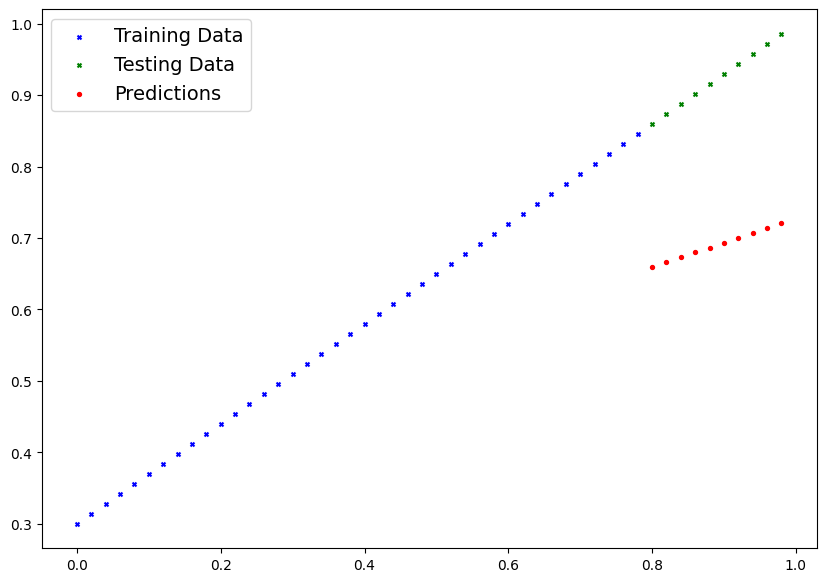

In [ ]:
# Plotting predictions made by our random parameters that we created. We will train our model to adjust these parameters.
plot_predictions(predictions=y_preds)

## 3. Training Model

The whole idea of training a model is to move from *unknown* random parameters to *known* parameters. Which basically represent the data in a better manner.

Our function should be able to predict the values such that the cost function gives us minimum value. To do that, we use gradient descent.

* **Loss Function** -  Measures how poor our model's predictions are compared to the ideal values. Also known as cost function or criterion.

* **Optimizer** - Takes into account the value of our loss and then changes the values of our parameters such that we're minimizing the loss.
Inside the optimizer, you'll often have to set two values -
  1. `params` - the model parameters you'd like to optimize.
  2. `lr` - The learning rate. How fast or slow you want your parameter values to be updated.

Specifically for PyTorch, we need -
* A training loop
* A testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [ ]:
# Check out our model's parameters in the form of an ordered dictionary.
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

Mean Absolute Error Explained -
![MAE](https://raw.github.com/suryansh-sinha/Learning-PyTorch/main/Daniel%20Bourke/images/01_PyTorch_Workflow/mae-loss-annotated.png)

In [ ]:
# Setup a loss function
lossFunc = nn.L1Loss()  # L1 Loss is mean absolute error. Take the sum of absolute values of the differences between predicted and real values, then take it's mean.

# Setup an optimizer (we're using stochastic gradient descent)
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01) # lr is learning rate.

## Building a training loop in PyTorch

A couple of things we need in a training loop:
0. Loop through the data and do the following steps -
1. Forward pass (this involves moving data through our model's `forward()` function) to make predictions on data. This is also called forward propagation.
2. Calculate the loss (compare forward pass predictions to actual values)
3. Optimizer zero grad
4. Backward Propagation - move backwards through the network, adjusting our weights and biases by finding their gradients with respect to the loss function.
5. Optimizer Step - Use the optimizer to adjust the weights and biases such that it improves loss. (**Gradient Descent**)

In [ ]:
list(model_0.parameters())  # This block shows our original random values of parameters.

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

Training Loop Explained -

![Training Loop](https://raw.github.com/suryansh-sinha/Learning-PyTorch/main/Daniel%20Bourke/images/01_PyTorch_Workflow/pytorch-training-loop-annotated.png)

In [ ]:
# Setting a manual seed to control the randomness of the program.
torch.manual_seed(42)

# An epoch is one loop through our data. This is a hyperparameter (because we've set it ourselves)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data.
for epoch in range(epochs):
  # Set the model to training mode.
  model_0.train() # Train mode sets all parameters that require gradient to require gradient.

  # 1. Forward propagation
  y_pred = model_0(X_train) # Making our model predict outputs using current weight and bias.

  # 2. Calculate our loss
  loss = lossFunc(y_pred, y_train)  # Calculating the value of our loss function.
  # print(f'Loss: {loss}')
  # We take partial derivative of loss function wrt each parameter during backpropagation.

  # 3. Optimizer zero grad.
  optimizer.zero_grad() # This functions sets the gradients of all our parameters to be zero because the gradients add up after each epoch, we set them to zero for fresh starts.

  # 4. Backpropagation
  loss.backward() # Backward function calculates the gradient descent for all the parameters of our model that have reqires_grad=True

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()  # Step function is basically updating our parameters based on the gradient descent we calculated.

  ### Testing
  model_0.eval()  # Turns off settings which we don't need during testing. (dropout, batch norm etc)
  with torch.inference_mode():  # Turns off gradient tracking. Inference mode is torch.no_grad() on steroids!
    # 1. Forward Pass
    test_pred = model_0(X_test)
    # 2. Loss Calculation
    test_loss = lossFunc(test_pred, y_test)

  # Print out what's happening
  if epoch%5 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f'Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}')
    print(model_0.state_dict())
    print()


Epoch: 0 | Loss: 0.08169572055339813 | Test Loss: 0.22662055492401123
OrderedDict([('weights', tensor([0.3398])), ('bias', tensor([0.3939]))])

Epoch: 5 | Loss: 0.07310795783996582 | Test Loss: 0.2008223533630371
OrderedDict([('weights', tensor([0.3542])), ('bias', tensor([0.4069]))])

Epoch: 10 | Loss: 0.06808149069547653 | Test Loss: 0.1807345449924469
OrderedDict([('weights', tensor([0.3672])), ('bias', tensor([0.4154]))])

Epoch: 15 | Loss: 0.06489682197570801 | Test Loss: 0.1665084809064865
OrderedDict([('weights', tensor([0.3787])), ('bias', tensor([0.4194]))])

Epoch: 20 | Loss: 0.06258393079042435 | Test Loss: 0.15627031028270721
OrderedDict([('weights', tensor([0.3891])), ('bias', tensor([0.4204]))])

Epoch: 25 | Loss: 0.0605839304625988 | Test Loss: 0.14737029373645782
OrderedDict([('weights', tensor([0.3991])), ('bias', tensor([0.4204]))])

Epoch: 30 | Loss: 0.05879194289445877 | Test Loss: 0.1418602615594864
OrderedDict([('weights', tensor([0.4081])), ('bias', tensor([0.417

In [ ]:
model_0.state_dict()  # Parameters after 1 epoch

OrderedDict([('weights', tensor([0.6962])), ('bias', tensor([0.3064]))])

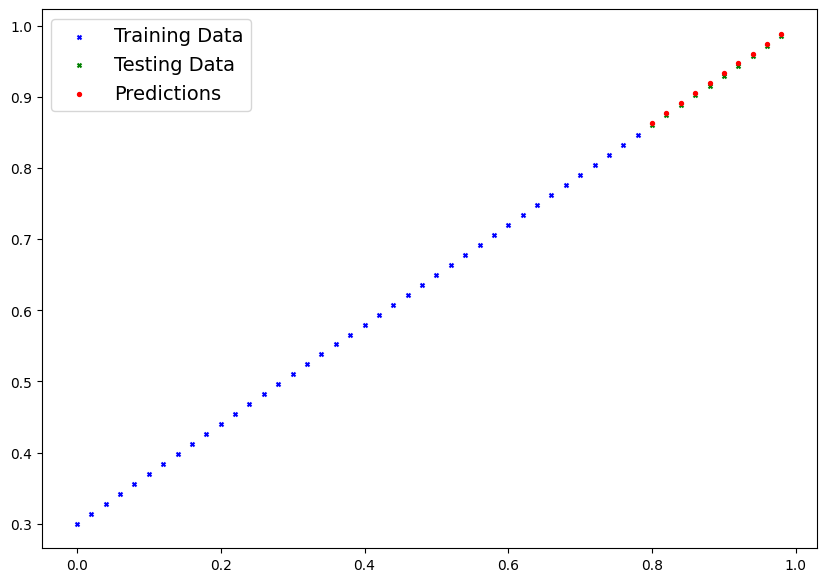

In [ ]:
with torch.inference_mode():
  finalPredictions = model_0(X_test)

plot_predictions(predictions=finalPredictions)

In [ ]:
torch.tensor(loss_values).numpy()

array([0.08169572, 0.07310796, 0.06808149, 0.06489682, 0.06258393,
       0.06058393, 0.05879194, 0.05704694, 0.05530194, 0.05355694,
       0.05182225, 0.05010534, 0.04838594, 0.04666654, 0.04494876,
       0.04323454, 0.04152032, 0.03980172, 0.03808232, 0.03636292,
       0.03464684, 0.03293261, 0.03121751, 0.02949809, 0.02777871,
       0.0260593 , 0.0243449 , 0.02263068, 0.0209139 , 0.01919449,
       0.01747509, 0.01575719, 0.01404297, 0.01232875, 0.01061027,
       0.00889087, 0.00717147, 0.00545526, 0.00374104, 0.00203175],
      dtype=float32)

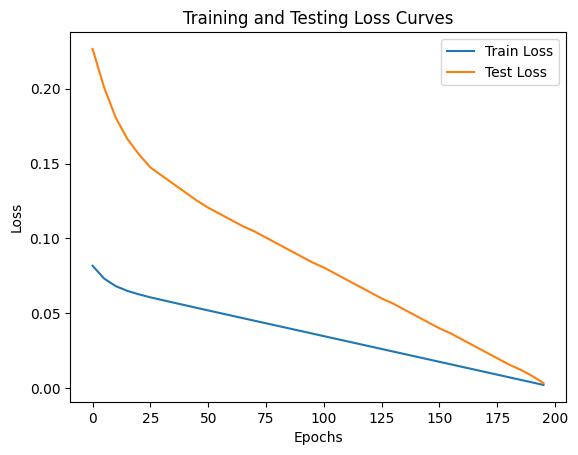

In [ ]:
# Plotting the loss curves.
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label="Train Loss")
plt.plot(epoch_count, torch.tensor(test_loss_values).numpy(), label="Test Loss")
plt.title("Training and Testing Loss Curves")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

# Saving and Loading Model Data

PyTorch uses the pickle module from python to save and load models. In pickle, we use the word serializing for saving and de-serializing for loading.

There are 3 main functions you need to know for saving and loading models in PyTorch:

1. `torch.save()` - allows you to save a PyTorch model in Python's pickle format. Saves a serialized object to disk. This function uses Python’s pickle utility for serialization. Models, tensors, and dictionaries of all kinds of objects can be saved using this function.
2. `torch.load()` - allows you to load a saved PyTorch object. Uses pickle’s unpickling facilities to deserialize pickled object files to memory.
3. `torch.nn.Module.load_state_dict()` - allows to load a model's saved state dictionary. Loads a model’s parameter dictionary using a deserialized state_dict.

In [ ]:
model_0.state_dict()  # PyTorch saves our model's important parameters in a python dictionary.

OrderedDict([('weights', tensor([0.6962])), ('bias', tensor([0.3064]))])

There are 2 ways of saving/loading a model.
1. You can either save the state dict of the model.
2. You can save the entire model.

The PyTorch documentation states that saving the state_dict of the models is recommended instead of saving the entire model. So, it's a better practice to use method 1.

In [ ]:
# Saving our PyTorch model.
# Python's module for dealing with file paths.
from pathlib import Path

# 1. Create our model directory.
MODEL_PATH = Path("models") # The folder we want to save our models to.
MODEL_PATH.mkdir(parents=True, exist_ok=True) # If it already exists, it won't throw us an error.

# 2. Create model save path.
MODEL_NAME = '01_pytorch_workflow_model_0.pth' # PyTorch models are usually saved with the extension .pt or .pth
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Saving our model to the path generated.
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

MODEL_SAVE_PATH

Saving model to: models/01_pytorch_workflow_model_0.pth


PosixPath('models/01_pytorch_workflow_model_0.pth')

## Loading a PyTorch Model

Since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6962])), ('bias', tensor([0.3064]))])

In [ ]:
# To load in a saved state_dict, we have to instantiate a new instance of our model class.
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_0.eval()
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6962])), ('bias', tensor([0.3064]))])

In [ ]:
# Testing our loaded model's predictions.
with torch.inference_mode():
  modelPredictions = loaded_model_0(X_test)

modelPredictions == finalPredictions  # Comparing if both our models are predicting the same values.


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Revising everything and going back through all the steps above in one place.

In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

# Checking pytorch version
torch.__version__

'2.1.0+cu121'

Create device-agnostic code. Utilizing a gpu if it's available. This will improve performance drastically.

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cuda


### 6.1 Data

In [ ]:
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = X * weight + bias

In [ ]:
# Splitting the data
split_ratio = int(0.8 * len(X))
X_train, X_test = X[:split_ratio], X[split_ratio:]
y_train, y_test = y[:split_ratio], y[split_ratio:]

In [ ]:
def plot_predictions(train_data = X_train, train_labels = y_train,
                     test_data = X_test, test_labels = y_test,
                     predictions = None):

  # Plots training and test data and compares predictions.

  plt.figure(figsize=(10,7))  # Creates a new figure. figsize parameter takes width and height of figure in inches.

  # plt.scatter creates a scatter plot of y vs x. With varying marker size and/or color.
  # s represents the marker size. c represents the color of the marker.

  # Creating blue points for training data.
  plt.scatter(train_data, train_labels, s=4, c='b', marker='x', label="Training Data")

  # Creating green points for testing data. We can change the marker's shape also.
  plt.scatter(test_data, test_labels, s=4, c='g', marker='x', label="Testing Data")

  # Creating red points for our predicted data.
  if predictions is not None:

    # Sending predictions to cpu if they're on GPU.
    if predictions.device == 'cuda' or predictions.device == 'mps':
      predictions = torch.Tensor.cpu(predictions)

    # Plot the predictions if they exist.
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

  plt.legend(prop={'size': 14});

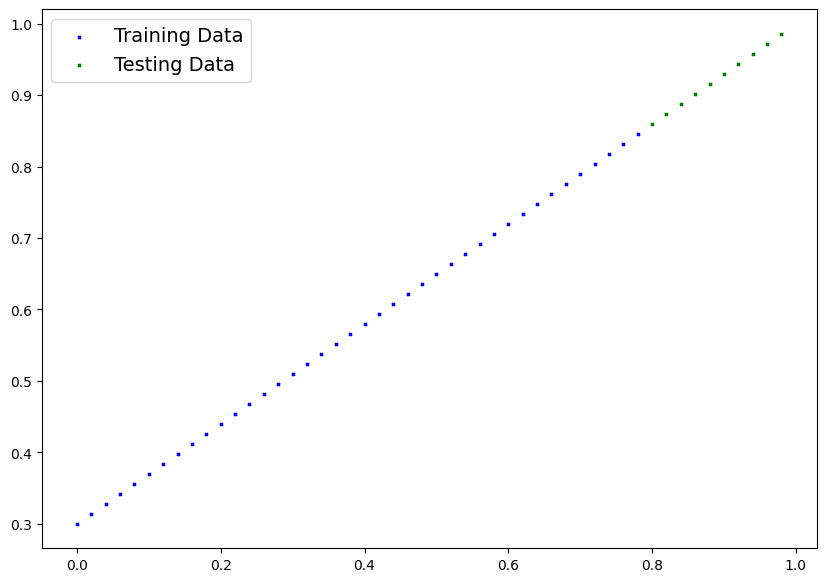

In [ ]:
# Plot the data -
plot_predictions()

### 6.2 Creating Model

In [ ]:
class LinearRegression(nn.Module):

  def __init__(self):
    super().__init__()

    # self.weights = nn.Parameter(torch.randn(1),
    #                             requires_grad=True)

    # self.bias = nn.Parameter(torch.randn(1),
    #                          requires_grad=True)

    # Use nn.Linear for creating model parameters.
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1,
                                  bias=True)

  # x: torch.Tensor means x should be a tensor and -> torch.Tensor means the function should output a tensor.
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    # return self.weights * x + self.bias
    return self.linear_layer(x) # Calling the layer in our forward method.

In [ ]:
torch.manual_seed(42)
finalModel = LinearRegression() # Creating an instance of our class.
finalModel.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
# Check the model's current device
next(finalModel.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the GPU.
finalModel.to(device)
next(finalModel.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Put the data on the new device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

### 6.3 Checking if our model predicts values and plotting those.

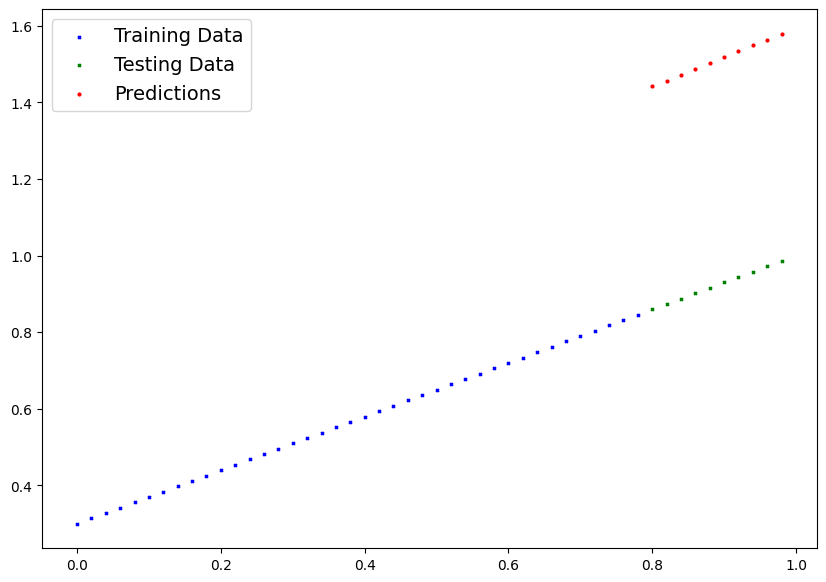

In [ ]:
finalModel.eval()

with torch.inference_mode():
  preds = finalModel(X_test)

plot_predictions(predictions=torch.Tensor.cpu(preds))

###6.4 Training Our Model

In [ ]:
loss_function = nn.L1Loss()

optimizer = torch.optim.SGD(finalModel.parameters(), lr=0.01)

In [ ]:
torch.manual_seed(42)

epochs = 500
epoch_count = []
train_losses = []
test_losses = []

for epoch in range(epochs):

  finalModel.train()  # Go to training mode.

  preds = finalModel(X_train) # Forward Propagation

  lossValue = loss_function(preds, y_train)  # Calculating the loss.

  optimizer.zero_grad() # Setting gradients to zero.

  lossValue.backward() # Backpropagation. Calculate derivative wrt loss.

  optimizer.step() # Optimizing values.

  # Testing
  finalModel.eval()
  with torch.inference_mode():
    predTest = finalModel(X_test)
    testLoss = loss_function(predTest, y_test)

  if(epoch%10 == 0):
    epoch_count.append(epoch)
    train_losses.append(lossValue)
    test_losses.append(testLoss)
    print(f'Epoch: {epoch} | Training Loss: {lossValue} | Testing Loss: {testLoss}')

Epoch: 0 | Training Loss: 0.5551779866218567 | Testing Loss: 0.5739762187004089
Epoch: 10 | Training Loss: 0.439968079328537 | Testing Loss: 0.4392664134502411
Epoch: 20 | Training Loss: 0.3247582018375397 | Testing Loss: 0.30455657839775085
Epoch: 30 | Training Loss: 0.20954833924770355 | Testing Loss: 0.16984669864177704
Epoch: 40 | Training Loss: 0.09433845430612564 | Testing Loss: 0.03513690456748009
Epoch: 50 | Training Loss: 0.023886388167738914 | Testing Loss: 0.04784907028079033
Epoch: 60 | Training Loss: 0.019956795498728752 | Testing Loss: 0.045803118497133255
Epoch: 70 | Training Loss: 0.016517987474799156 | Testing Loss: 0.037530567497015
Epoch: 80 | Training Loss: 0.013089174404740334 | Testing Loss: 0.02994490973651409
Epoch: 90 | Training Loss: 0.009653178043663502 | Testing Loss: 0.02167237363755703
Epoch: 100 | Training Loss: 0.006215683650225401 | Testing Loss: 0.014086711220443249
Epoch: 110 | Training Loss: 0.00278724217787385 | Testing Loss: 0.005814164876937866
Ep

In [ ]:
finalModel.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

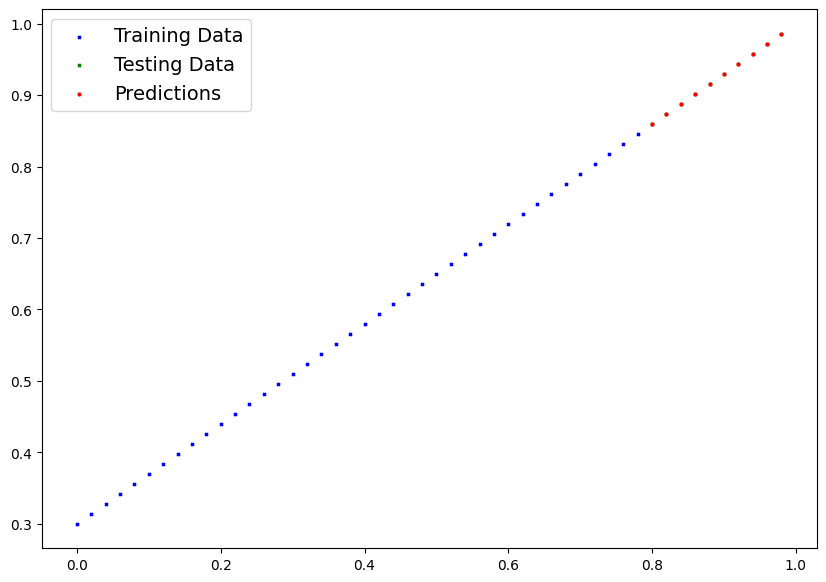

In [ ]:
plot_predictions(predictions=torch.Tensor.cpu(predTest))

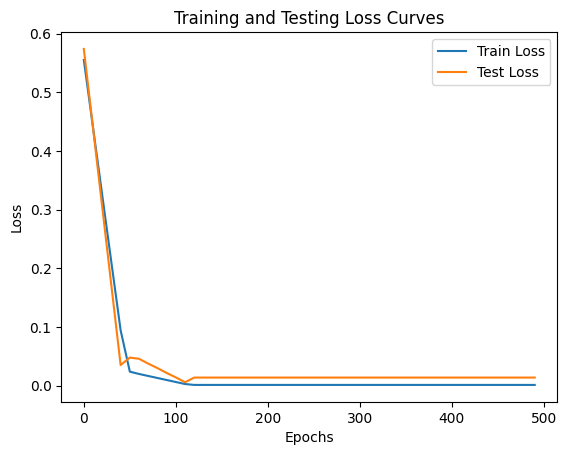

In [ ]:
plt.plot(epoch_count, torch.tensor(train_losses), label='Train Loss')
plt.plot(epoch_count, torch.tensor(test_losses), label='Test Loss')
plt.title('Training and Testing Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

### 6.5 Saving our Model

In [ ]:
from pathlib import Path

# 1. Create models directory if it already doesn't exist.
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Saving the model to the path created
print(f'Saving model to {MODEL_SAVE_PATH}')
torch.save(obj=finalModel.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to models/01_pytorch_workflow_model_1.pth


In [ ]:
# Creating a new instance of model to load the model
finalModelv1 = LinearRegression()
finalModelv1.load_state_dict(torch.load(MODEL_SAVE_PATH))
finalModelv1.to(device)

print(f'Loaded model :\n {finalModelv1}')
print(f'Model Device :\n {next(finalModelv1.parameters()).device}')

Loaded model :
 LinearRegression(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model Device :
 cuda:0


In [ ]:
# Evaluate loaded model
finalModelv1.eval()
with torch.inference_mode():
  predNew = finalModelv1(X_test)

# Checking if it makes the same predictions.
predTest == predNew

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

## Exercises -

1. Create a straight line dataset using the linear regression formula (weight * X + bias).
* Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
* Split the data into 80% training, 20% testing.
* Plot the training and testing data so it becomes visual.
2. Build a PyTorch model by subclassing nn.Module.
* Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
* Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
* Once you've constructed the model, make an instance of it and check its state_dict().
* Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.
3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
* Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
* Write a training loop to perform the appropriate training steps for 300 epochs.
* The training loop should test the model on the test dataset every 20 epochs.
4. Make predictions with the trained model on the test data.
* Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).
5. Save your trained model's state_dict() to file.
* Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
* Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [33]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(torch.__version__)

2.1.0+cu121


In [34]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.set_default_device(device)

In [35]:
# 1. Creating the data.
weight = 0.3
bias = 0.9

X = np.arange(0,10,0.1)
y = X*weight + bias

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

X_train[:10], y_train[:10]

(array([4.3, 3.9, 5.3, 1.7, 9.8, 6.6, 8.3, 7.8, 9.6, 4. ]),
 array([2.19, 2.07, 2.49, 1.41, 3.84, 2.88, 3.39, 3.24, 3.78, 2.1 ]))

In [36]:
# Converting data to tensors
X_train = torch.from_numpy(X_train).unsqueeze(dim=1)
y_train = torch.from_numpy(y_train).unsqueeze(dim=1)
X_test = torch.from_numpy(X_test).unsqueeze(dim=1)
y_test = torch.from_numpy(y_test).unsqueeze(dim=1)

X_test, y_test

(tensor([[6.9000],
         [5.2000],
         [5.0000],
         [4.5000],
         [3.5000],
         [2.1000],
         [1.2000],
         [8.5000],
         [2.6000],
         [1.5000],
         [5.9000],
         [9.9000],
         [6.1000],
         [3.2000],
         [4.1000],
         [7.9000],
         [5.1000],
         [6.5000],
         [2.7000],
         [1.0000]], dtype=torch.float64),
 tensor([[2.9700],
         [2.4600],
         [2.4000],
         [2.2500],
         [1.9500],
         [1.5300],
         [1.2600],
         [3.4500],
         [1.6800],
         [1.3500],
         [2.6700],
         [3.8700],
         [2.7300],
         [1.8600],
         [2.1300],
         [3.2700],
         [2.4300],
         [2.8500],
         [1.7100],
         [1.2000]], dtype=torch.float64))

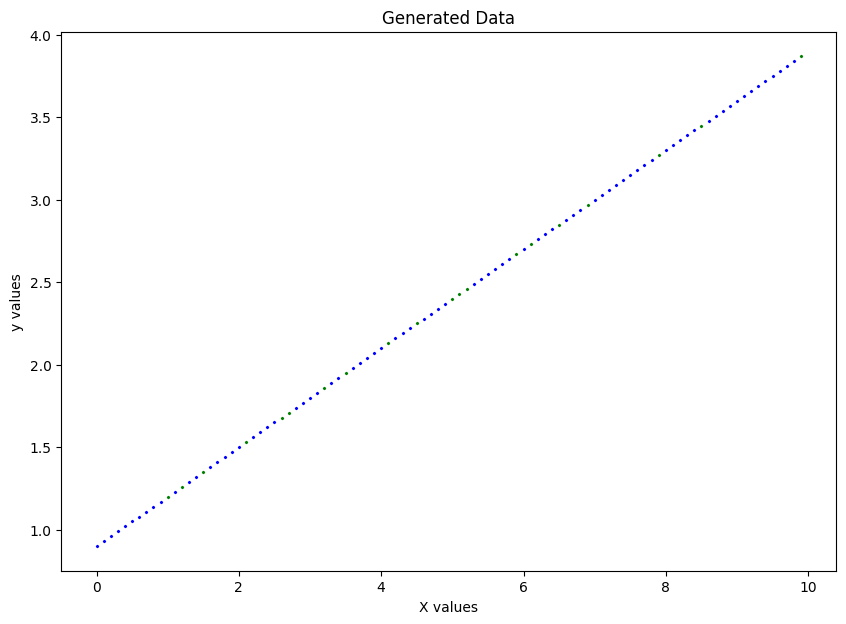

In [37]:
def plotData(train_data = X_train, train_labels = y_train,
             test_data = X_test, test_labels = y_test,
             predictions = None):

  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, s=2, c='b', marker='x')
  plt.scatter(test_data, test_labels, s=2, c='g', marker='x')
  plt.title('Generated Data')
  plt.xlabel('X values')
  plt.ylabel('y values')

  if predictions!=None:
    plt.scatter(X_test, predictions, s=2, c='r', marker='x')

  plt.show()

plotData()

In [38]:
class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()

    # Initializing params
    self.weight = nn.Parameter(torch.randn(1),
                               requires_grad=True)

    self.bias = nn.Parameter(torch.randn(1),
                             requires_grad=True)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return x * self.weight + self.bias

In [42]:
newModel = LinearModel()
print(newModel.state_dict())

OrderedDict([('weight', tensor([-0.7039])), ('bias', tensor([0.7980]))])


In [43]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=newModel.parameters(),
                            lr=0.01)

In [44]:
# Training and Testing Loop
epochs = 300
epoch_count = []
train_losses = []
test_losses = []

for epoch in range(epochs):

  # Training mode for model
  newModel.train()

  preds = newModel(X_train)

  loss = loss_fn(preds, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()


  newModel.eval()
  # Testing every 20 epochs
  if epoch%20 == 0:
    epoch_count.append(epoch)
    with torch.inference_mode():
      test_preds = newModel(X_test)
      test_loss = loss_fn(test_preds, y_test)
      train_losses.append(loss)
      test_losses.append(test_loss)


    print(f'Epoch: {epoch} | Training Loss: {loss} | Testing Loss: {test_loss}')

Epoch: 0 | Training Loss: 5.14136447763443 | Testing Loss: 4.545579080343247
Epoch: 20 | Training Loss: 0.07164385282993327 | Testing Loss: 0.17555549845099447
Epoch: 40 | Training Loss: 0.032850278258323796 | Testing Loss: 0.20961971095204351
Epoch: 60 | Training Loss: 0.07950529301166545 | Testing Loss: 0.16785590595006944
Epoch: 80 | Training Loss: 0.051196061611175625 | Testing Loss: 0.19511518216133114
Epoch: 100 | Training Loss: 0.040808585524559036 | Testing Loss: 0.20526647335290904
Epoch: 120 | Training Loss: 0.036056648135185346 | Testing Loss: 0.20996596461534503
Epoch: 140 | Training Loss: 0.03355682933330546 | Testing Loss: 0.2124657834172249
Epoch: 160 | Training Loss: 0.03255690181255351 | Testing Loss: 0.21346571093797687
Epoch: 180 | Training Loss: 0.03255690181255351 | Testing Loss: 0.21346571093797687
Epoch: 200 | Training Loss: 0.03255690181255351 | Testing Loss: 0.21346571093797687
Epoch: 220 | Training Loss: 0.03255690181255351 | Testing Loss: 0.21346571093797687


In [45]:
print(list(newModel.parameters()))

[Parameter containing:
tensor([0.3045], requires_grad=True), Parameter containing:
tensor([0.9098], requires_grad=True)]


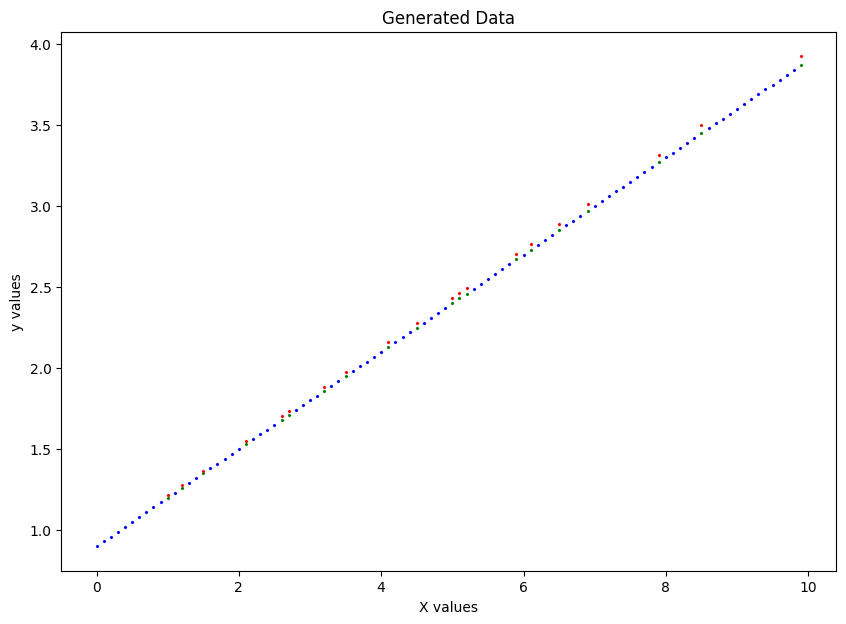

In [46]:
newModel.eval()
with torch.inference_mode():
  test_predictions = newModel(X_test)

plotData(predictions=test_predictions)

In [47]:
# Saving the model
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = 'exercise_model.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=newModel.state_dict(),
           f=MODEL_SAVE_PATH)

In [49]:
exModel = LinearModel()
exModel.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
print(exModel.state_dict())

OrderedDict([('weight', tensor([0.3045])), ('bias', tensor([0.9098]))])


In [50]:
# Making predictions with new model and checking if they are equal to first model's predictions
loadedPreds = exModel(X_test)
loadedPreds == test_predictions

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])